# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player taking the last object wins.

* Task3.4: An agent using reinforcement learning

In [1]:
# Copied and adapted from
# https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88


from nim_environment import NimBoard
from rl_agent import Agent
import matplotlib.pyplot as plt
from nim_utils import game_over, expert_strategy, pure_random, level_three

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 

0: 0.0
50: 0.17647058823529413
100: 0.22772277227722773
150: 0.25165562913907286
200: 0.26865671641791045
250: 0.26693227091633465
300: 0.27906976744186046
350: 0.27350427350427353
400: 0.2967581047381546
450: 0.2926829268292683
500: 0.3153692614770459
550: 0.3411978221415608
600: 0.3594009983361065
650: 0.3778801843317972
700: 0.37660485021398005
750: 0.3848202396804261
800: 0.39076154806491886
850: 0.39482961222091656
900: 0.40288568257491675
950: 0.416403785488959
1000: 0.4195804195804196
1050: 0.42435775451950525
1100: 0.4232515894641235
1150: 0.4274543874891399
1200: 0.42547876769358867
1250: 0.4276578737010392
1300: 0.431206764027671
1350: 0.4396743153219837
1400: 0.4439685938615275
1450: 0.450723638869745
1500: 0.45836109260493
1550: 0.4616376531270148
1600: 0.47158026233604
1650: 0.47849788007268323
1700: 0.48559670781893005
1750: 0.4934323243860651
1800: 0.4991671293725708
1850: 0.5013506212857914
190

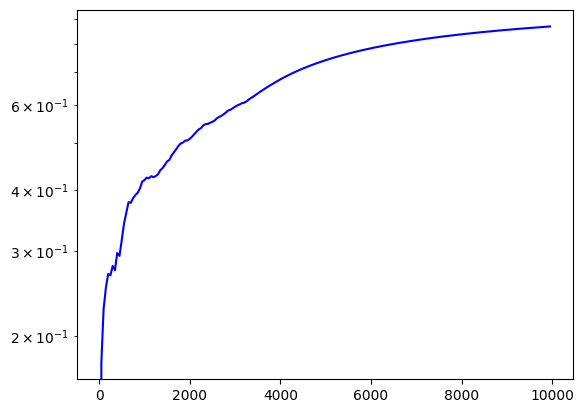

In [8]:
NIM_SIZE = 4
if __name__ == '__main__':
    nim = NimBoard(NIM_SIZE)
    robot = Agent(nim, alpha=0.1, random_factor=0.4)
    moveHistory = []
    indices = []

    nim.display_board()
    print()

    strategy = level_three
    
    players = ['agent', 'b']
    turn = 0

    for i in range(10_000):

        while not game_over(nim, players, turn):
            
            if players[turn] == "b":
                 ply = strategy(nim)
                 nim.nimming(ply)

            if players[turn] == "agent":
                state, _ = nim.get_state_and_reward()  # get the current state
                # choose an action (explore or exploit)
                action = robot.choose_action(state)
                nim.update_board(action)  # update the nim according to the action
                state, reward = nim.get_state_and_reward()  # get the new state and reward
                # update the robot memory with state and reward
                if state != (0, 0, 0):
                    robot.update_state_history(state, reward)
                if nim.steps > 1000:
                    # end the robot if it takes too long to find the goal
                    for idx in range(len(nim.rows)):
                        nim.rows[idx] = 0
            
            turn = (turn + 1) % 2
        state, reward = nim.get_state_and_reward(nim.winner == 0)
        robot.update_state_history(state, reward)

        robot.update_results(nim.winner == 0)
        robot.learn()  # robot should learn after every episode
        # get a history of number of steps taken to plot later
        if i % 50 == 0:
            print(f"{i}: {robot.get_avg_wins()}")
            moveHistory.append(robot.get_avg_wins())
            indices.append(i)
        nim = NimBoard(NIM_SIZE)  # reinitialize the nim

plt.semilogy(indices, moveHistory, "b")
plt.show()

